# uniform distribution on [0, 1]

$$ 
f_X(x)=\left\{\begin{eqnarray*}
1& , & \text{ if } x \in [0,1] \\
0& , & \text{ otherwise}\\
\end{eqnarray*}
\right.
$$

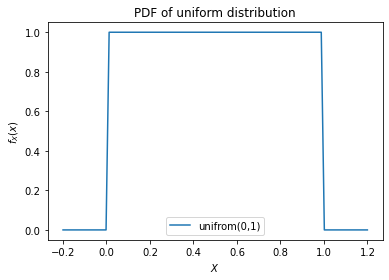

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-0.2, 1.2, 100)
uniform_pdf = (x >= 0) * (x <= 1) 
fig, ax = plt.subplots()
ax.plot(x, uniform_pdf, label='unifrom(0,1)')
ax.set_title('PDF of uniform distribution')
ax.set_xlabel('$X$')
ax.set_ylabel('$f_X(x)$')
ax.legend()


# PDF of the standard normal

$$f_X(x) = \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2})$$

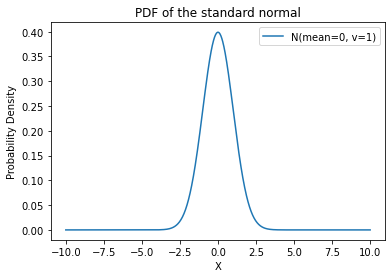

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
std_normal = norm.pdf(x, loc=0, scale=1)

fig, ax = plt.subplots()
ax.plot(x, std_normal, label='N(mean=0, v=1)')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('PDF of the standard normal')
ax.legend()

plt.show()

# PDF of Exponential distribution


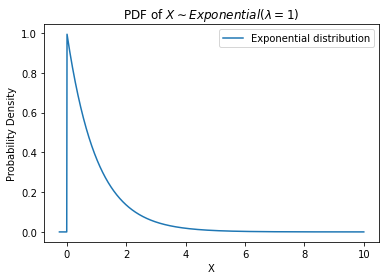

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

x = np.linspace(-0.25, 10, 1000)
lam = 1
pdf_exponential = expon.pdf(x, loc=0, scale=1/lam)

fig, ax = plt.subplots()
ax.plot(x, pdf_exponential, label='Exponential distribution')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('PDF of $X \sim  {Exponential}(\lambda=1)$')
ax.legend()

plt.show()

# PDF of Y=X^3
## random variable X
$$X \sim Unif[0, 2]$$

## random variable Y
$$Y=X^3$$
$$f_Y(y)=1/(6y^{2/3})$$

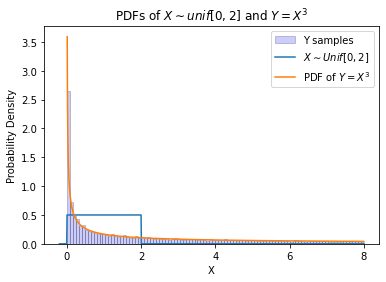

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Range of X values
x = np.linspace(-0.2, 8, 1000)
y = np.linspace(0.01, 8, 1000)

# Calculate the PDF of X
unif_pdf = (x >= 0) * (x <= 2) * 0.5
pdf_y = 1/(6*y**(2/3))

fig, ax = plt.subplots()

# Number of samples
num_samples = 10000

# Generate samples from X~Unif(0, 2)
samples_x = np.random.uniform(0, 2, num_samples)

# verify: Compute samples of X*X
samples_y = samples_x ** 3

# Create the histogram
ax.hist(samples_y, bins=100, density=True, alpha=0.2, color='b', edgecolor='black', label='Y samples')

# Plot the PDF of Z
ax.plot(x, unif_pdf, label='$X \sim Unif[0, 2]$')
ax.plot(y, pdf_y,label='PDF of $Y=X^3$')

ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('PDFs of $X\sim unif[0,2]$ and $Y=X^3$')
ax.legend()

plt.show()

# PDF of Y=ln(x)
## random variable X
$$X \sim Unif[0, 2]$$

## random variable Y
$$Y=\ln X$$
$$f_Y(y)=f_X(e^y) e^y$$

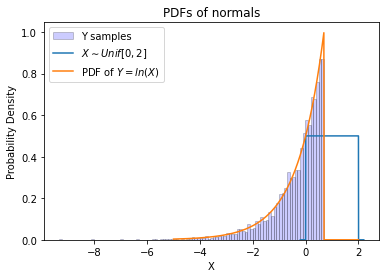

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Range of X values
x = np.linspace(-0.2, 2.2, 1000)
y = np.linspace(-5, 2.0, 1000)

# Calculate the PDF of X
unif_pdf = (x >= 0) * (x <= 2) * 0.5
pdf_y = 0.5 * (np.exp(y)>=0) * (np.exp(y)<=2) * np.exp(y)

# verify: Generate samples of Y
num_samples = 5000
samples_x = np.random.uniform(0, 2, num_samples)
samples_y = np.log(samples_x)

fig, ax = plt.subplots()

# Create the histogram
ax.hist(samples_y, bins=100, density=True, alpha=0.2, color='b', edgecolor='black', label='Y samples')

# Plot the PDF of Z
ax.plot(x, unif_pdf, label='$X \sim Unif[0, 2]$')
ax.plot(y, pdf_y,label='PDF of $Y=ln(X)$')

ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('PDFs of normals')
ax.legend()
plt.show()

# PDF of Y=X^2
## Random variable X and Y
$$ X \sim N(0,1)$$
$$ Y = X^2$$

## PDFs of X and Y 
$$f_X(x) = \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2})$$

$$
\begin{eqnarray}
f_Y(y) & = & f_X(\sqrt{y}) \frac{1}{2\sqrt{y}} + f_X(-\sqrt{y}) \frac{1}{2\sqrt{y}} \\
& = & f_X(\sqrt{y})/\sqrt{y} \\
& = & \frac{1}{\sqrt{2y\pi}} \exp\left(\frac{-y}{2}\right) \\
\end{eqnarray}
$$

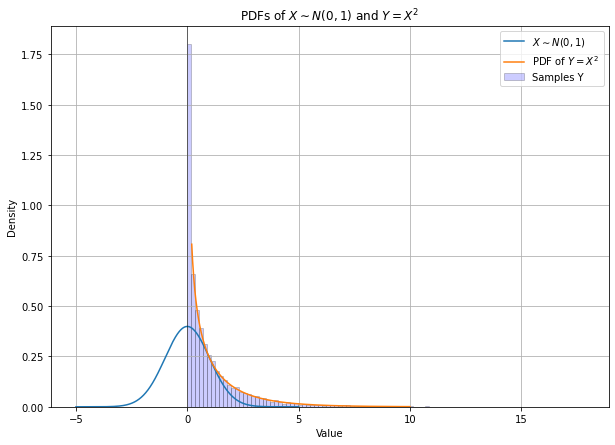

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Ranges of random variable X and Y
x = np.linspace(-5, 5, 1000)
y = np.linspace(0.2, 10, 1000)

# Calculate the PDFs of X and Y=X*X
pdf_x = norm.pdf(x, loc=0, scale=1)
pdf_y = np.exp(-y / 2) / np.sqrt(2 * y * np.pi)

# Generate fig and ax objects
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the PDF of Z
ax.plot(x, pdf_x, label='$X \sim N(0,1)$')
ax.plot(y, pdf_y, label='PDF of $Y=X^2$')

# Generate 10000 samples from X^2 and plot the histogram
samples_x = np.random.normal(loc=0, scale=1, size=10000)
ax.hist(samples_x**2, bins=100, density=True, alpha=0.2, color='b', 
        edgecolor='black', label='Samples Y')

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('PDFs of $X \sim N(0,1)$ and $Y=X^2$')

# Adding x and y axes
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)

ax.legend()
plt.grid(True)
plt.show()
